<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [4]:
%pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [5]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [6]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


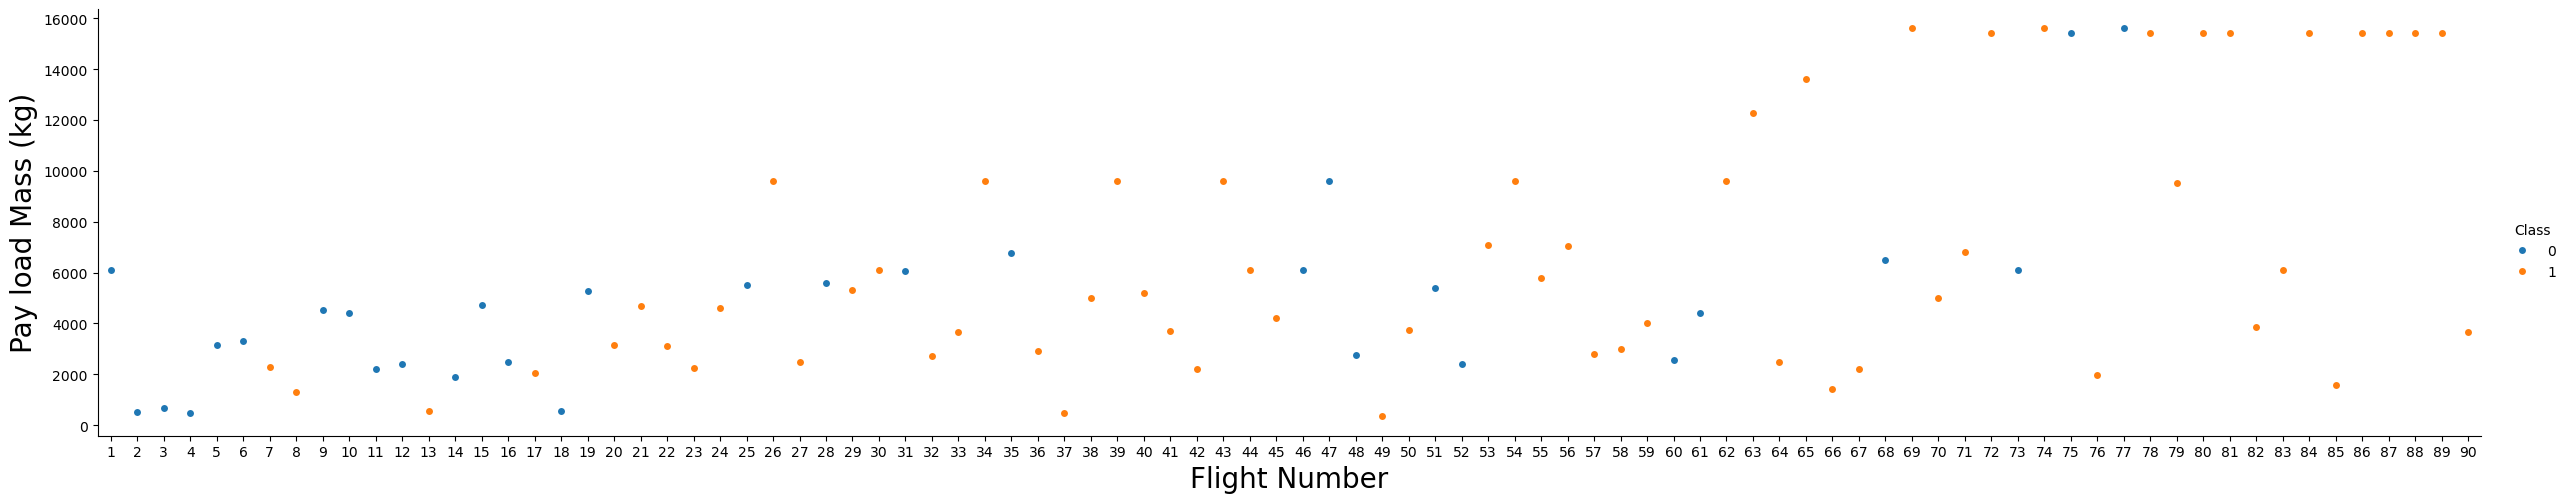

In [7]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


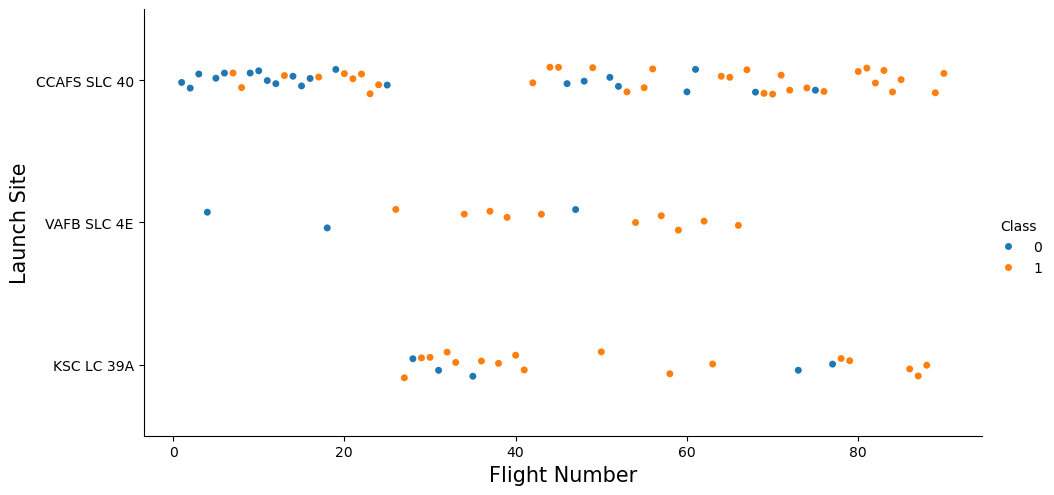

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Early launches had more failures, but success increased with flight experience. Some sites (like KSC LC-39A) showed earlier adoption of reusable boosters

In [9]:
# Count of successful vs failed launches per Launch Site
launch_summary = df.groupby(['LaunchSite', 'Class']).size().unstack(fill_value=0)
print(launch_summary)

Class          0   1
LaunchSite          
CCAFS SLC 40  22  33
KSC LC 39A     5  17
VAFB SLC 4E    3  10


In [10]:
# Calculate success rate per Launch Site
for site in df['LaunchSite'].unique():
    site_data = df[df['LaunchSite'] == site]
    success_rate = site_data['Class'].mean() * 100
    print(f"Launch Site {site} has a success rate of {success_rate:.2f}%")

Launch Site CCAFS SLC 40 has a success rate of 60.00%
Launch Site VAFB SLC 4E has a success rate of 76.92%
Launch Site KSC LC 39A has a success rate of 77.27%


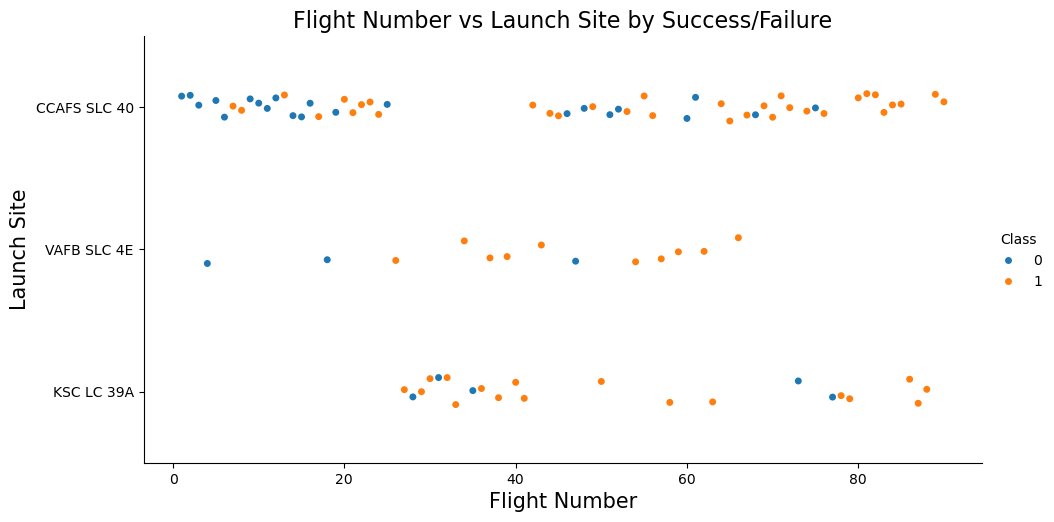

Explanation of patterns:
1. Each row represents a Launch Site and each point a Flight Number.
2. The hue (color) represents the class: 1 = Success, 0 = Failure.
3. Sites with more points indicate higher launch frequency.
4. A cluster of successes (same color) shows a site is reliable.
5. Mixed colors show inconsistency at a site.
6. Flight Number trends (x-axis) show how success/failure changes over time.


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Flight Number vs Launch Site, colored by success/failure (Class)
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site by Success/Failure", fontsize=16)
plt.show()

# Explanation of patterns
print("Explanation of patterns:")
print("1. Each row represents a Launch Site and each point a Flight Number.")
print("2. The hue (color) represents the class: 1 = Success, 0 = Failure.")
print("3. Sites with more points indicate higher launch frequency.")
print("4. A cluster of successes (same color) shows a site is reliable.")
print("5. Mixed colors show inconsistency at a site.")
print("6. Flight Number trends (x-axis) show how success/failure changes over time.")

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


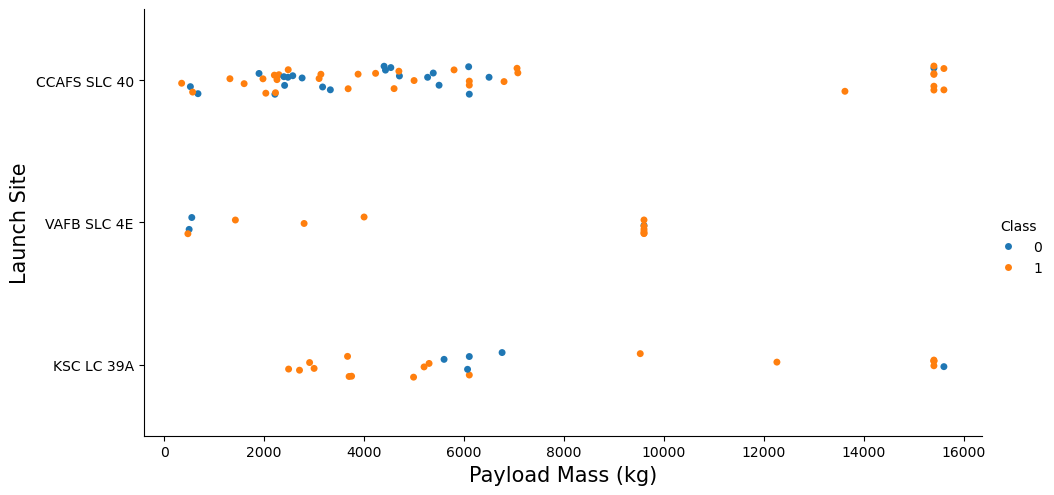

In [13]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show()


VAFB-SLC launches have lighter payloads (no >10,000 kg). Heavier payloads are seen at CCAFS and KSC.

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


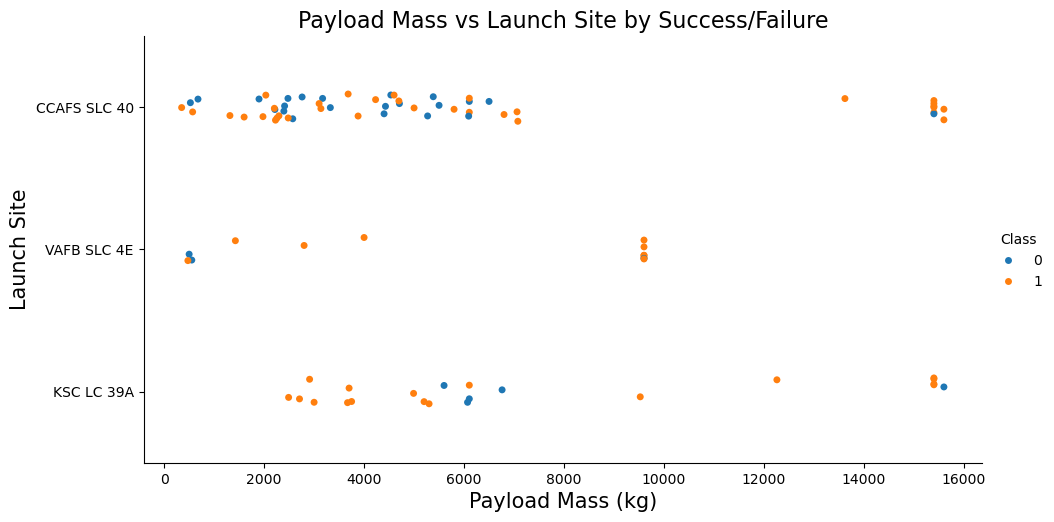

Explanation of patterns:
1. Each row represents a Launch Site and each point a Payload Mass.
2. The hue (color) represents the class: 1 = Success, 0 = Failure.
3. Some Launch Sites handle heavier payloads more successfully than others.
4. If failures (color 0) appear at higher payloads, it may indicate a payload limit for that site or rocket version.
5. Clusters of successes at certain payload ranges show reliability for specific mass ranges.
6. Observing trends across sites can help identify which sites are better for heavy vs light payloads.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Payload Mass vs Launch Site, colored by success/failure (Class)
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site by Success/Failure", fontsize=16)
plt.show()

# Explanation of patterns
print("Explanation of patterns:")
print("1. Each row represents a Launch Site and each point a Payload Mass.")
print("2. The hue (color) represents the class: 1 = Success, 0 = Failure.")
print("3. Some Launch Sites handle heavier payloads more successfully than others.")
print("4. If failures (color 0) appear at higher payloads, it may indicate a payload limit for that site or rocket version.")
print("5. Clusters of successes at certain payload ranges show reliability for specific mass ranges.")
print("6. Observing trends across sites can help identify which sites are better for heavy vs light payloads.")

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


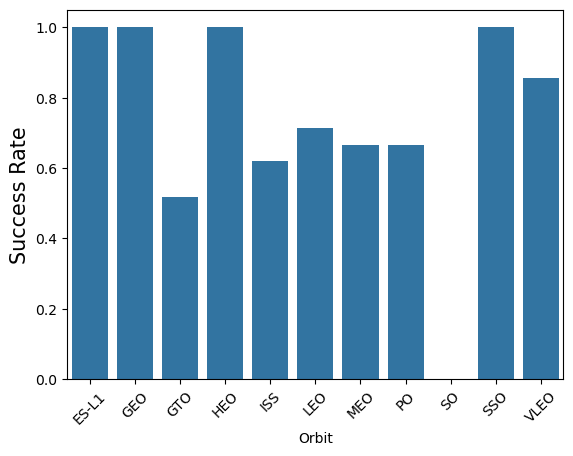

In [15]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()
sns.barplot(x="Orbit", y="Class", data=orbit_success)
plt.ylabel("Success Rate", fontsize=15)
plt.xticks(rotation=45)
plt.show()


Orbits like LEO and ISS have higher success rates. GTO is riskier.

Analyze the ploted bar chart try to find which orbits have high sucess rate.


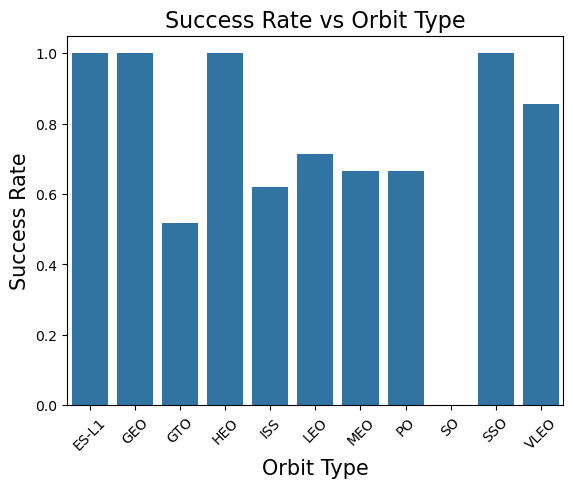

Explanation of patterns:
1. Each bar represents the average success rate for a specific Orbit type.
2. Higher bars indicate Orbits with more successful launches.
3. Lower bars indicate Orbits with a higher failure rate.
4. This can reveal which Orbit types are more challenging or less reliable for launches.
5. Comparing bars can help identify patterns: e.g., LEO launches may be more successful than GTO orbits.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate success rate per Orbit
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Bar plot: Success Rate vs Orbit
sns.barplot(x="Orbit", y="Class", data=orbit_success)
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate vs Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Explanation of patterns
print("Explanation of patterns:")
print("1. Each bar represents the average success rate for a specific Orbit type.")
print("2. Higher bars indicate Orbits with more successful launches.")
print("3. Lower bars indicate Orbits with a higher failure rate.")
print("4. This can reveal which Orbit types are more challenging or less reliable for launches.")
print("5. Comparing bars can help identify patterns: e.g., LEO launches may be more successful than GTO orbits.")


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


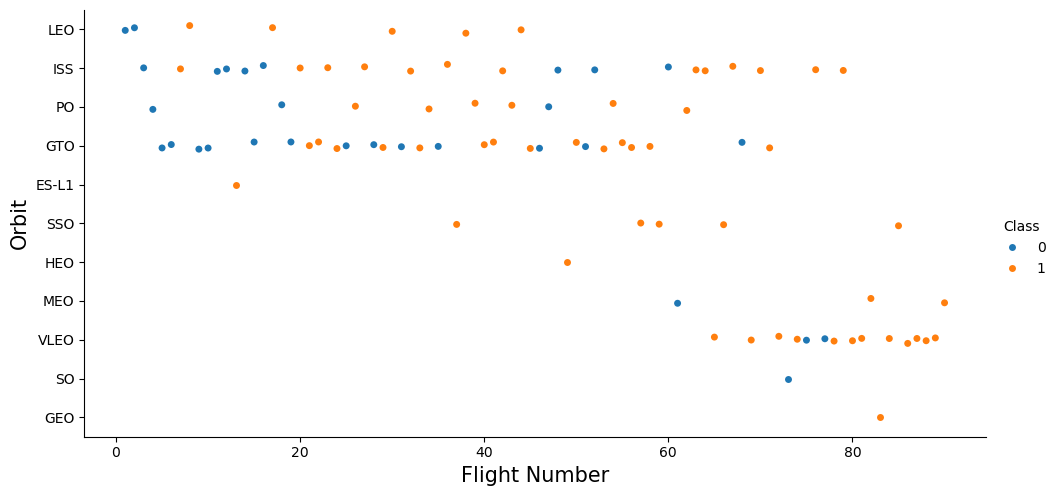

In [17]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.show()


LEO missions improve with flight number. GTO success doesn’t strongly correlate with flight number.

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


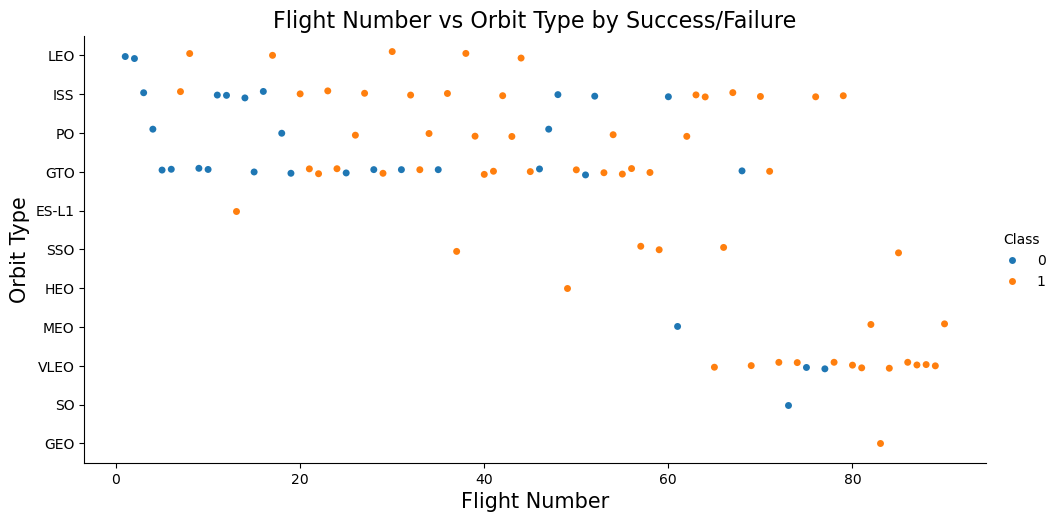

Explanation of patterns:
1. Each row represents an Orbit type and each point a Flight Number.
2. The hue (color) represents class: 1 = Success, 0 = Failure.
3. You can see which Orbits had failures early on and whether success improved over time.
4. Some Orbits may have more points, indicating more frequent launches.
5. Trends along the x-axis (Flight Number) show how launch success evolves for different Orbits.
6. Clusters of successes suggest Orbit types that are reliably reached.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Flight Number vs Orbit, colored by success/failure (Class)
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type by Success/Failure", fontsize=16)
plt.show()

# Explanation of patterns
print("Explanation of patterns:")
print("1. Each row represents an Orbit type and each point a Flight Number.")
print("2. The hue (color) represents class: 1 = Success, 0 = Failure.")
print("3. You can see which Orbits had failures early on and whether success improved over time.")
print("4. Some Orbits may have more points, indicating more frequent launches.")
print("5. Trends along the x-axis (Flight Number) show how launch success evolves for different Orbits.")
print("6. Clusters of successes suggest Orbit types that are reliably reached.")


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


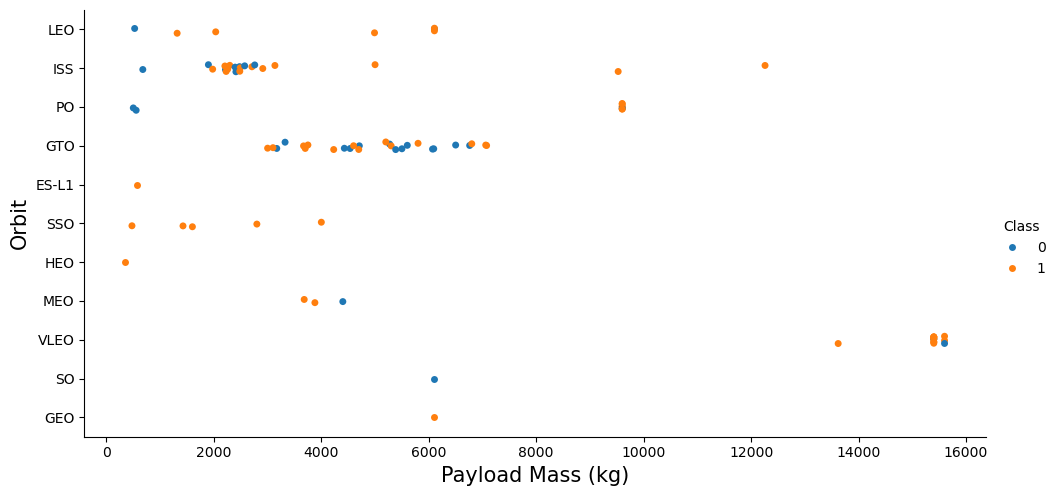

In [19]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.show()


Heavy payloads succeed more in Polar, LEO, ISS. GTO shows mixed results regardless of payload.

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




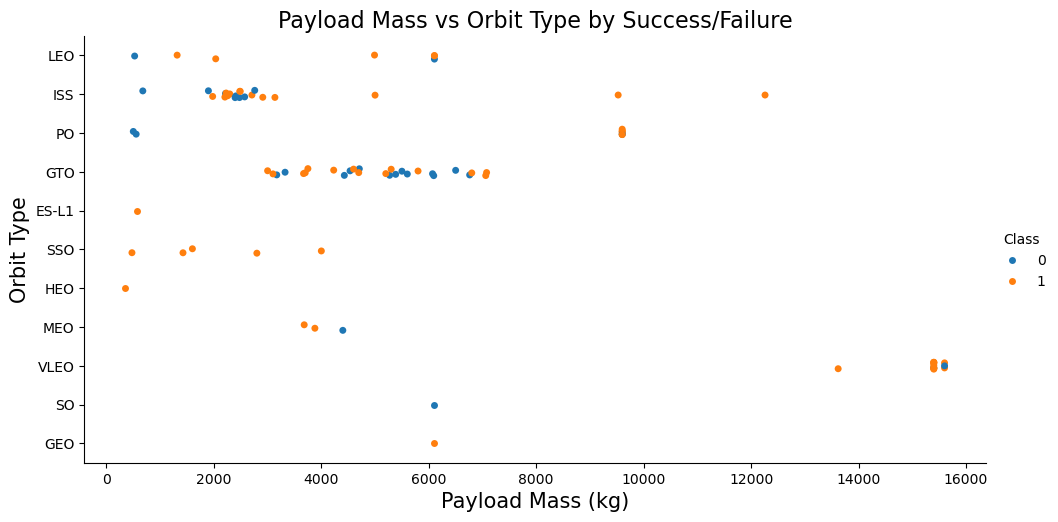

Explanation of patterns:
1. Each row represents an Orbit type and each point a launch with its payload mass.
2. The hue (color) represents the launch outcome: 1 = Success, 0 = Failure.
3. Clusters of failures at certain payload ranges indicate payload limits or challenges for that Orbit type.
4. Orbits with mostly successes show reliable performance across the payload range.
5. Comparing payload ranges across Orbits can reveal which Orbits are better suited for heavier or lighter payloads.
6. Trends can help identify risk patterns related to payload mass for each Orbit type.


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Payload Mass vs Orbit, colored by success/failure (Class)
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type by Success/Failure", fontsize=16)
plt.show()

# Explanation of patterns
print("Explanation of patterns:")
print("1. Each row represents an Orbit type and each point a launch with its payload mass.")
print("2. The hue (color) represents the launch outcome: 1 = Success, 0 = Failure.")
print("3. Clusters of failures at certain payload ranges indicate payload limits or challenges for that Orbit type.")
print("4. Orbits with mostly successes show reliable performance across the payload range.")
print("5. Comparing payload ranges across Orbits can reveal which Orbits are better suited for heavier or lighter payloads.")
print("6. Trends can help identify risk patterns related to payload mass for each Orbit type.")

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [21]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

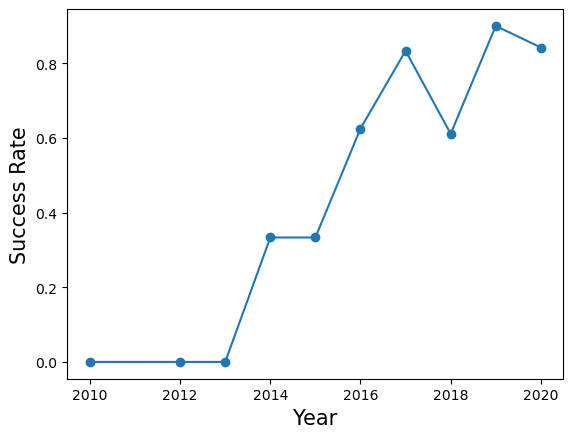

In [23]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df["Year"] = pd.to_datetime(df["Date"]).dt.year
yearly_success = df.groupby("Year")["Class"].mean().reset_index()

plt.plot(yearly_success["Year"], yearly_success["Class"], marker='o')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.show()


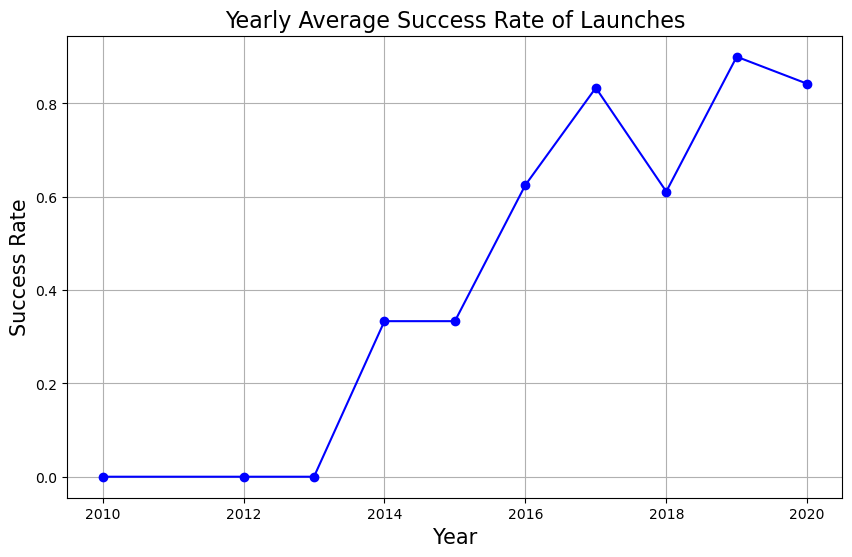

Explanation of patterns:
1. The x-axis represents the year of the launch, y-axis represents the average success rate.
2. The line shows trends in success rate over time.
3. Increasing trend indicates improvements in launch technology and reliability.
4. Years with lower success rate highlight early challenges or failures.
5. Plateaus or dips can point to specific incidents or difficult missions in certain years.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from Date and calculate yearly success rate
df["Year"] = pd.to_datetime(df["Date"]).dt.year
yearly_success = df.groupby("Year")["Class"].mean().reset_index()

# Line chart: Yearly Average Success Rate
plt.figure(figsize=(10,6))
plt.plot(yearly_success["Year"], yearly_success["Class"], marker='o', linestyle='-', color='b')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Yearly Average Success Rate of Launches", fontsize=16)
plt.grid(True)
plt.show()

# Explanation of patterns
print("Explanation of patterns:")
print("1. The x-axis represents the year of the launch, y-axis represents the average success rate.")
print("2. The line shows trends in success rate over time.")
print("3. Increasing trend indicates improvements in launch technology and reliability.")
print("4. Years with lower success rate highlight early challenges or failures.")
print("5. Plateaus or dips can point to specific incidents or difficult missions in certain years.")


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [26]:
# Show 5 sample records
sample_records = df.head(5)
print(sample_records)

# Show unique launch sites
unique_sites = df['LaunchSite'].unique()
print("Unique Launch Sites:", unique_sites)

# Short explanation
print("\nExplanation:")
print(f"There are {len(unique_sites)} unique launch sites in the dataset.")
print("These are the locations from which the rockets have been launched.")

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857

In [33]:
# Check unique booster versions
print(df['BoosterVersion'].unique())

['Falcon 9']


In [34]:
# Filter rows for Falcon 9 boosters
falcon9_payload = df[df['BoosterVersion'] == "Falcon 9"]

# Calculate average payload mass
avg_payload = falcon9_payload['PayloadMass'].mean()
print("Average Payload Mass for Falcon 9:", avg_payload, "kg")

# Short explanation
print("\nExplanation:")
print(f"The Falcon 9 booster carried an average payload of {avg_payload:.2f} kg per launch.")
print("This represents the typical payload for this booster version in the dataset.")

Average Payload Mass for Falcon 9: 6104.959411764707 kg

Explanation:
The Falcon 9 booster carried an average payload of 6104.96 kg per launch.
This represents the typical payload for this booster version in the dataset.


In [35]:
# Filter for successful landings on a ground pad
ground_success = df[(df['LandingPad'].notna()) & (df['Class'] == 1)]

# Get the earliest date
first_landing_date = ground_success['Date'].min()
print("Date of first successful landing on a ground pad:", first_landing_date)

# Short explanation
print("\nExplanation:")
print(f"The first successful landing on a ground pad occurred on {first_landing_date}.")
print("This shows when SpaceX first achieved a safe booster landing on land.")

Date of first successful landing on a ground pad: 2015-12-22

Explanation:
The first successful landing on a ground pad occurred on 2015-12-22.
This shows when SpaceX first achieved a safe booster landing on land.


In [36]:
# Filter for successful drone ship landings with payload between 4000 and 6000 kg
drone_ship_boosters = df[
    (df['LandingPad'].str.contains("ASDS", na=False)) &
    (df['Class'] == 1) &
    (df['PayloadMass'] > 4000) &
    (df['PayloadMass'] < 6000)
]

# Get the unique booster names
unique_boosters = drone_ship_boosters['BoosterVersion'].unique()
print("Boosters meeting criteria:", unique_boosters)

# Short explanation
print("\nExplanation:")
print(f"The boosters listed above successfully landed on drone ships while carrying payloads between 4000 and 6000 kg.")

Boosters meeting criteria: []

Explanation:
The boosters listed above successfully landed on drone ships while carrying payloads between 4000 and 6000 kg.


In [37]:
# Display all records with successful landings on drone ships
drone_ship_records = df[(df['LandingPad'].str.contains("ASDS", na=False)) & (df['Class'] == 1)]
print(drone_ship_records[['BoosterVersion', 'PayloadMass', 'LandingPad', 'Class']])

# Optional: see the min/max payloads for these successful drone ship landings
print("\nPayload Mass range for successful drone ship landings:")
print(drone_ship_records['PayloadMass'].min(), "-", drone_ship_records['PayloadMass'].max())

Empty DataFrame
Columns: [BoosterVersion, PayloadMass, LandingPad, Class]
Index: []

Payload Mass range for successful drone ship landings:
nan - nan


In [38]:
# Count of successful and failed missions
mission_counts = df['Class'].value_counts()
print("Mission outcomes:\n", mission_counts)

# Short explanation
success_count = mission_counts.get(1, 0)
failure_count = mission_counts.get(0, 0)

print("\nExplanation:")
print(f"There are {success_count} successful missions and {failure_count} failed missions in the dataset.")


Mission outcomes:
 Class
1    60
0    30
Name: count, dtype: int64

Explanation:
There are 60 successful missions and 30 failed missions in the dataset.


In [39]:
# Find the maximum payload mass
max_payload = df['PayloadMass'].max()

# Filter boosters that carried this maximum payload
boosters_max_payload = df[df['PayloadMass'] == max_payload]['BoosterVersion'].unique()
print("Boosters with maximum payload:", boosters_max_payload)

# Short explanation
print("\nExplanation:")
print(f"The booster(s) listed above carried the maximum payload of {max_payload} kg in the dataset.")


Boosters with maximum payload: ['Falcon 9']

Explanation:
The booster(s) listed above carried the maximum payload of 15600.0 kg in the dataset.


In [40]:
# Filter for 2015, failed landings on drone ships
failed_drone_2015 = df[
    (df['Year'] == 2015) &
    (df['Class'] == 0) & 
    (df['LandingPad'].str.contains("ASDS", na=False))
][['BoosterVersion', 'LaunchSite', 'LandingPad', 'Class', 'Year']]

print(failed_drone_2015)

# Short explanation
print("\nExplanation:")
print(f"The table above lists the boosters that failed to land on drone ships in 2015, along with their launch sites.")



Empty DataFrame
Columns: [BoosterVersion, LaunchSite, LandingPad, Class, Year]
Index: []

Explanation:
The table above lists the boosters that failed to land on drone ships in 2015, along with their launch sites.


In [41]:
# Filter for year 2015 and failed landings on drone ships
check_failed_2015 = df[
    (df['Year'] == 2015) &
    (df['Class'] == 0) & 
    (df['LandingPad'].str.contains("ASDS", na=False))
]

# Display results
print(check_failed_2015)
print("Number of failed drone ship landings in 2015:", len(check_failed_2015))

Empty DataFrame
Columns: [FlightNumber, Date, BoosterVersion, PayloadMass, Orbit, LaunchSite, Outcome, Flights, GridFins, Reused, Legs, LandingPad, Block, ReusedCount, Serial, Longitude, Latitude, Class, Year]
Index: []
Number of failed drone ship landings in 2015: 0


In [42]:
# Filter the dataset between the dates
date_filtered = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]

# Count landing outcomes and rank in descending order
landing_counts = date_filtered['Outcome'].value_counts().sort_values(ascending=False)
print(landing_counts)

# Short explanation
print("\nExplanation:")
print("The table above shows the count of different landing outcomes between 2010-06-04 and 2017-03-20, ranked from most frequent to least frequent.")


Outcome
None None      9
True ASDS      5
False ASDS     4
True RTLS      3
True Ocean     3
False Ocean    2
None ASDS      2
Name: count, dtype: int64

Explanation:
The table above shows the count of different landing outcomes between 2010-06-04 and 2017-03-20, ranked from most frequent to least frequent.


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [15]:
# HINT: Use get_dummies() function on the categorical columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 
               'Block', 'ReusedCount', 'Serial']]

features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [16]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [19]:
import pandas as pd

# Load the dataset again
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Select only the features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]

# Apply one-hot encoding to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Show the number of columns
print("Total number of columns:", features_one_hot.shape[1])

# If you want to double-check what the columns look like:
print(features_one_hot.columns)

Total number of columns: 80
Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
  

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
